In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/iris-dataset/iris.csv


# > ***09)	Evaluation of K-Nearest Neighbours classifier performance on Iris Dataset with varying test size***

In [2]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

In [3]:
iris = load_iris()
# print(iris)

In [4]:
X, y = iris.data, iris.target

print(X.shape, len(y))

(150, 4) 150


In [5]:
clf = KNeighborsClassifier(n_neighbors = 3)
aris= []
j = [0.2,0.3,0.4,0.5]

In [6]:
for i in j:
    X_train, test_x, y_train, test_lab = train_test_split(X, y, test_size = i, random_state = 42)
    print(X_train.shape, test_x.shape, len(y_train), len(test_lab))
    clf = clf.fit(X_train, y_train)
    test_pred_deci_tree = clf.predict(test_x)
    print(test_lab, len(test_lab))
    print(test_pred_deci_tree, len(test_pred_deci_tree))
    print("ARI for 3", adjusted_rand_score(test_pred_deci_tree, test_lab))
    print("*************************************")
    aris.append(adjusted_rand_score(test_pred_deci_tree, test_lab))

(120, 4) (30, 4) 120 30
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0] 30
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0] 30
ARI for 3 1.0
*************************************
(105, 4) (45, 4) 105 45
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0 0 0 2 1 1 0 0] 45
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0 0 0 2 1 1 0 0] 45
ARI for 3 1.0
*************************************
(90, 4) (60, 4) 90 60
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0 0 0 2 1 1 0 0 1 2 2 1 2 1 2 1 0 2 1 0 0 0 1] 60
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0 0 0 2 1 1 0 0 1 1 2 1 2 1 2 1 0 2 1 0 0 0 1] 60
ARI for 3 0.9537575274646324
*************************************
(75, 4) (75, 4) 75 75
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0 0 0 2 1 1 0 0 1 2 2 1 2 1 2 1 0 2 1 0 0 0 1 2 0 0 0 1 0 1 2 0 1 2 0 2 2
 1] 75
[1 0 2

In [7]:
j1 = ["0.2", "0.3", "0.4", "0.5"]
print(aris)
print(j)

[1.0, 1.0, 0.9537575274646324, 0.928216922463694]
[0.2, 0.3, 0.4, 0.5]


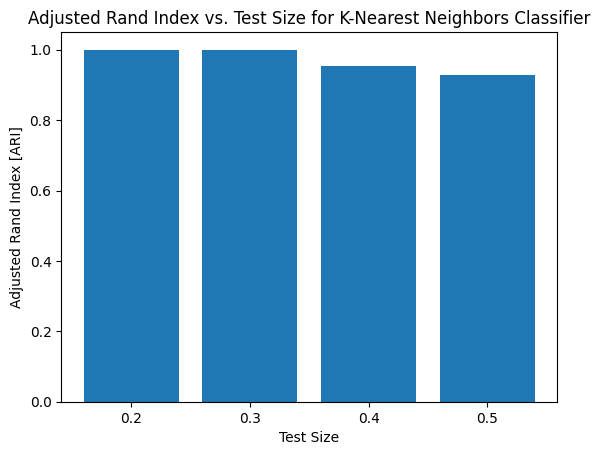

In [8]:
fig = plt.figure()
plt.bar(j1,aris)
plt.xlabel("Test Size")
plt.ylabel("Adjusted Rand Index [ARI]")
plt.title("Adjusted Rand Index vs. Test Size for K-Nearest Neighbors Classifier")
plt.show()